# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [89]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [86]:
# functions

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df.loc[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

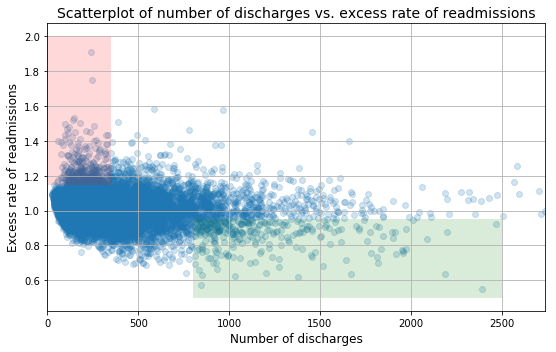

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Do you agree with the above analysis and recommendations? Why or why not?

I **do not agree** with the above analysis, although the analysis may be true. First of all, the analysis states that there is a significant difference between low and high discharge rates but **does not provide the p-values or the testing required** to suggest such a statement. It does provide information on the proportions, but that is not enough to provide the statistical testing the claim. Also, without a correlation test, the analysis should not state taht there is a significant correlation between hospital capacity and admission rates.

The recommendations may have some truth to them. However, I feel there should be more of emphasis on the second point than the first point. The first point may hurt severely underfunded/underresourced hospitals and facilities. What is weird with the recommendation though is it uses 300 as small capacity hospitals, whereas the analysis was with 100. This should be clarified. 

In [82]:
# we can probably clean the data more because of na values and outliers
df = clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'].notna()][:-3]

### Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### Setup an appropriate hypothesis test:

* Null Hypothesis = Hospitals/facilities with low discharge numbers (<100) have a readmission ratio equal to those hospitals/facilities that have high discharge rates 
    * H0: Mu(ratios with discharges < 100) = Mu(ratios with discharges >1000)
* Alternative hypothesis = Hospitals with low discharge numbers have a readmission ratio higher than those hospitals/facilities that have high discharge rates/facilites
    * HA: Mu(ratios with discharges < 100) > Mu(ratios with discharges >1000)
* $\alpha$ = .01

#### Compute and report the observed significance value (or p-value).

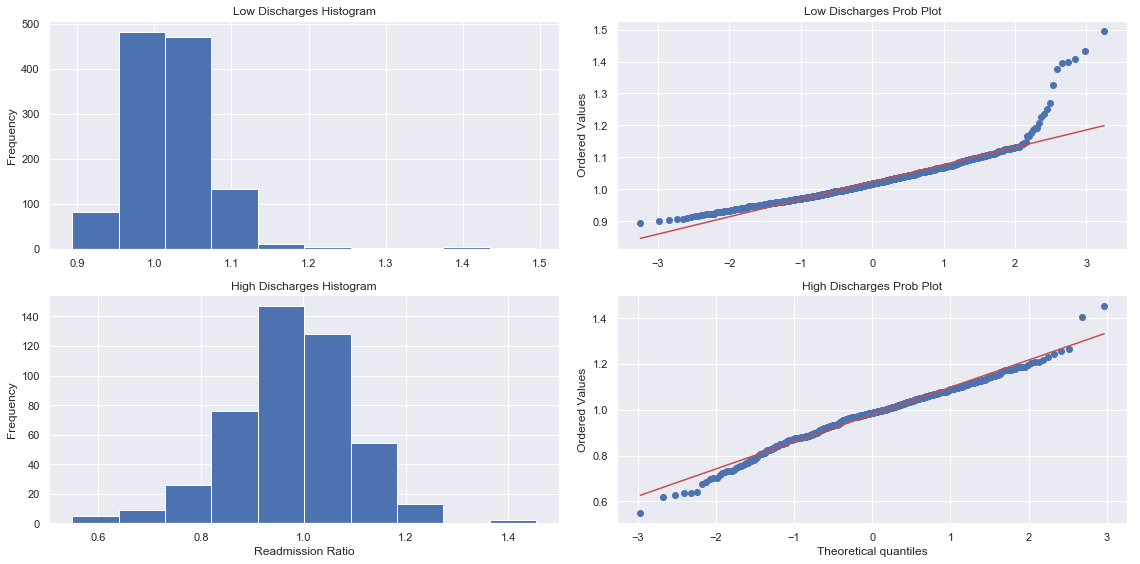

In [115]:
# Explore the data

data_low_discharge = df['Excess Readmission Ratio'][df['Number of Discharges'] < 100]
data_hgh_discharge = df['Excess Readmission Ratio'][df['Number of Discharges'] > 1000]

_ = plt.figure(figsize=(16,8))

_ = plt.subplot(2,2,1)
_ = plt.hist(data_low_discharge)
_ = plt.ylabel('Frequency')
_ = plt.title('Low Discharges Histogram')

_ = plt.subplot(2,2,2)
_ = stats.probplot(data_low_discharge, plot=plt)
_ = plt.xlabel('')
_ = plt.title('Low Discharges Prob Plot')

_ = plt.subplot(2,2,3)
_ = plt.hist(data_hgh_discharge)
_ = plt.ylabel('Frequency')
_ = plt.title('High Discharges Histogram')
_ = plt.xlabel('Readmission Ratio')

_ = plt.subplot(2,2,4)
_ = stats.probplot(data_hgh_discharge, plot=plt)
_ = plt.title('High Discharges Prob Plot')

plt.tight_layout()
plt.show()


The two populations seem fairly **normal**. Therefore, it would be appropriate to do statistical testing.

In [122]:
# Bootstrap Hypothesis testing

empirical_diff = diff_of_means(data_low_discharge, data_hgh_discharge)

# assume means are the same
data_low_discharge_shifted = data_low_discharge - np.mean(data_low_discharge) + empirical_diff
data_hgh_discharge_shifted = data_hgh_discharge - np.mean(data_hgh_discharge) + empirical_diff

# generate bootstrap replicates

bs_reps_low = draw_bs_reps(data_low_discharge_shifted, np.mean, 10000)
bs_reps_hgh = draw_bs_reps(data_hgh_discharge_shifted, np.mean, 10000)

diff_in_ratios = bs_reps_low - bs_reps_hgh

print('The margin of error of the sample is:', round(np.std(diff_in_ratios),4))

print('The confidence interval for the difference in means is: -inf to', round(np.percentile(diff_in_ratios,99),4))

p = np.sum(diff_in_ratios >= empirical_diff)/len(diff_in_ratios)
print('The p-value is:', p)

The margin of error of the sample is: 0.0059
The confidence interval for the difference in means is: -inf to 0.014
The p-value is: 0.0


As given in the statistical testing above, the p-value for the difference in readmission ratios is 0.0 which is below the value of $\alpha$. Therefore, we **reject** the null hypothesis. This reaffirms the previous analysis that the readmission ratios are statistically significantly lower in hospitals with higher discharges.

Now, what I would recommend to do is explore the reason why this is why before just throwing money and resources at the smaller facilities. There could be other variables at work here. It could even lead to another question like is it really better to have a lower readmission ratio? Is this the best feature to use to inference the quality of care a particular hospital.

#### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance and practical significance are different. With enough data and statistical wizardry, one may be able to call something statistically significant when the difference might not be practically significant. Take for example costs of two parts, part A and part B. After some statistical testing, it was suggested that part A is significantly lower than part B. However, the actual difference may just be a couple of cents. If the customer was a wholesale distributor, this may be very important. However, for the general customer, this difference is negligible and would probably come down to preference.

With that in mind, the difference in the means for the readmission ratios is ~0.0435 which is a 4.25% decrease of readmission ratios from lower discharge hospitals compared to higher discharge hospitals. It was determined that this was a significant difference. However, it is not really analyzed how much that optimization would increase the quality of care (if this is the metric to look at). If hospitals were to reach a readmission ratio determined by this analysis to be appropriate, but the quality of care doesn't increase, there wouldn't have been any practical significance to this change. Therefore, this doesn't change my recommendation to the client where I suggest looking for other parameters or variables that may back this claim up. Or have the client wait until more quantitative or actionable analysis is found. 

#### Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.
      
Using a scatterplot is good for graphically analyzing trends in data over a continuous variable. However, where it is disadvantageous is for comparisons. The analysis above is a comparison. Therefore, a better plot one may use is a bar graph or a box plot. This can be seen below.

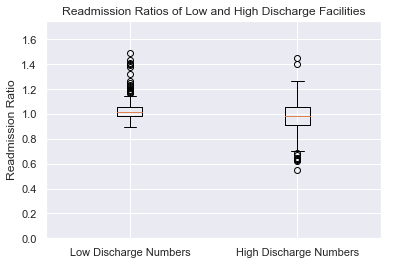

In [138]:
_ = plt.boxplot([data_low_discharge, data_hgh_discharge], labels=['Low Discharge Numbers', 'High Discharge Numbers'])
_ = plt.ylabel('Readmission Ratio')
_ = plt.title('Readmission Ratios of Low and High Discharge Facilities')
_ = plt.ylim([0, 1.75])
plt.show()

By looking at the boxplot, it casts some ambiguity on the practical significance of the analysis above. Visually speaking, there doesn't really seem to much difference between the two populations. This may be a good example of using statitistics to make bold claims when there might not be any practicality to it.